# Mahabharata

## Frame

Central Theme: Karna's life shaped due to his actions

Exploratory Questions:
- Other code sample has the questions


## Acquire

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import FreqDist

In [4]:
with open("data/mhbhrt/mahafull.txt", "r") as f:
    file = f.read()

In [5]:
# Get all the chapters
raw = file.split("BOOK")[1:]
len(raw)
# raw[0]

18

In [6]:
# Create the dataframe
mhb_df = pd.DataFrame({"book": raw})


## Refine

Further break down the books to get the following elements in its structure.
- sections
- sentences
- words

### Get chapter & title text

In [7]:
books = mhb_df.copy()

In [8]:
books['book_title'] = books.book.str.split("\n").str[2]
books['book_num'] = books.index+1
books

,book,book_title,book_num
0,1\n\nADI PARVA\n\nTRANSLATOR'S PREFACE\n\nThe...,ADI PARVA,1
1,2\n\nSABHA PARVA\n\n\nSECTION I\n\n(Sabhakriy...,SABHA PARVA,2
2,3 \n\nVANA PARVA\n\nSECTION I\n\n(Aranyaka Pa...,VANA PARVA,3
3,4\n\nVIRATA PARVA\n\nSECTION I\n\n(Pandava-Pr...,VIRATA PARVA,4
4,5\n\nUDYOGA PARVA\n\nSECTION I\n\nOM! HAVING ...,UDYOGA PARVA,5
5,6\n\nBHISHMA PARVA\n\nSECTION I\n\n(Jamvu-kha...,BHISHMA PARVA,6
6,7\n\nDRONA PARVA\n\nSECTION I\n\n(Dronabhishe...,DRONA PARVA,7
7,8\n\nKARNA-PARVA\n\nSECTION 1\n\nOm! Having b...,KARNA-PARVA,8
8,9\n\nSHALYA-PARVA\n\nSECTION 1\n\nOm! Having ...,SHALYA-PARVA,9
9,10\n\nSAUPTIKA-PARVA\n\nSECTION 1\n\nOm! Havi...,SAUPTIKA-PARVA,10


In [9]:
# book titles and book_setions
book_sections=["book_title" + "\t" + "section_title" + "\t" + "section_content"]
for j in range(len(raw)):
    book_title = raw[j].split("\n")[2]
    book_section = raw[j].split("SECTION")[1:]
    for i in range(len(book_section)):
        loop_var = book_title + '/t' + str(book_section[i].split("\n")[0].strip()) +'\t'+ str(book_section[i][1:])
        book_sections.append(loop_var)
book_sections[2]

'ADI PARVA/tII\tII\n\n"The Rishis said, \'O son of Suta, we wish to hear a full and\ncircumstantial account of the place mentioned by you as Samanta-panchaya.\'\n\n"Sauti said, \'Listen, O ye Brahmanas, to the sacred descriptions I utter\nO ye best of men, ye deserve to hear of the place known as\nSamanta-panchaka. In the interval between the Treta and Dwapara Yugas,\nRama (the son of Jamadagni) great among all who have borne arms, urged by\nimpatience of wrongs, repeatedly smote the noble race of Kshatriyas. And\nwhen that fiery meteor, by his own valour, annihilated the entire tribe\nof the Kshatriyas, he formed at Samanta-panchaka five lakes of blood. We\nare told that his reason being overpowered by anger he offered oblations\nof blood to the manes of his ancestors, standing in the midst of the\nsanguine waters of those lakes. It was then that his forefathers of whom\nRichika was the first having arrived there addressed him thus, \'O Rama, O\nblessed Rama, O offspring of Bhrigu, we

### Generic Unnest Function

In [10]:
def unnest_tokens(dataframe, column, tokenizer, new_column='word'): 
    """
    Applies a tokenizer to a column and then unnest the dataframe
    
    dataframe: dataframe with text
    column: name of the column with the text
    new_column: what you want the column of words to be called
    tokenizer: a function to be used to tokenize the text
    """ 
    new_column_num = new_column + "_num"
    df = ( dataframe[column]
              .apply(tokenizer)
              .apply(pd.Series)
              .stack()
              .reset_index(level=1)
              .rename(columns={0: new_column, "level_1":new_column_num})
              .join(dataframe.drop(column, axis=1), how='left')
              .reset_index(drop=True)
         )
    df[new_column_num] = pd.to_numeric(df[new_column_num])
    df[new_column_num] = df[new_column_num] + 1
    return df

### Section-Tokenzier

In [11]:
def section_tokenizer(text):
    return text.split("SECTION")[1:]

In [12]:
print(books)

                                                 book             book_title  \
0    1\n\nADI PARVA\n\nTRANSLATOR'S PREFACE\n\nThe...              ADI PARVA   
1    2\n\nSABHA PARVA\n\n\nSECTION I\n\n(Sabhakriy...            SABHA PARVA   
2    3 \n\nVANA PARVA\n\nSECTION I\n\n(Aranyaka Pa...             VANA PARVA   
3    4\n\nVIRATA PARVA\n\nSECTION I\n\n(Pandava-Pr...           VIRATA PARVA   
4    5\n\nUDYOGA PARVA\n\nSECTION I\n\nOM! HAVING ...           UDYOGA PARVA   
5    6\n\nBHISHMA PARVA\n\nSECTION I\n\n(Jamvu-kha...          BHISHMA PARVA   
6    7\n\nDRONA PARVA\n\nSECTION I\n\n(Dronabhishe...            DRONA PARVA   
7    8\n\nKARNA-PARVA\n\nSECTION 1\n\nOm! Having b...            KARNA-PARVA   
8    9\n\nSHALYA-PARVA\n\nSECTION 1\n\nOm! Having ...           SHALYA-PARVA   
9    10\n\nSAUPTIKA-PARVA\n\nSECTION 1\n\nOm! Havi...         SAUPTIKA-PARVA   
10   11\n\nSTRI-PARVA\n\nSECTION 1\n\n(Jalapradani...             STRI-PARVA   
11   12\n\nSANTI PARVA\n\nSECTION I\n\n(

In [13]:
#splitting into sections using the unnest function
sections = unnest_tokens(books, "book", section_tokenizer, "section")
sections.head()

,section_num,section,book_title,book_num
0,1,I\n\nOm! Having bowed down to Narayana and Na...,ADI PARVA,1
1,2,"II\n\n""The Rishis said, 'O son of Suta, we wi...",ADI PARVA,1
2,3,"III\n\n(Paushya Parva)\n\nSauti said, ""Janame...",ADI PARVA,1
3,4,"IV\n\n(Pauloma Parva)\n\n'UGRASRAVA SAUTI, th...",ADI PARVA,1
4,5,"V\n\n(Pauloma Parva continued)\n\n""Saunaka sa...",ADI PARVA,1


In [14]:
type(sections)

pandas.core.frame.DataFrame

In [15]:
sections['section'][0]

' I\n\nOm! Having bowed down to Narayana and Nara, the most exalted male being,\nand also to the goddess Saraswati, must the word Jaya be uttered.\n\nUgrasrava, the son of Lomaharshana, surnamed Sauti, well-versed in the\nPuranas, bending with humility, one day approached the great sages of\nrigid vows, sitting at their ease, who had attended the twelve years\'\nsacrifice of Saunaka, surnamed Kulapati, in the forest of Naimisha. Those\nascetics, wishing to hear his wonderful narrations, presently began to\naddress him who had thus arrived at that recluse abode of the inhabitants\nof the forest of Naimisha. Having been entertained with due respect by\nthose holy men, he saluted those Munis (sages) with joined palms, even\nall of them, and inquired about the progress of their asceticism. Then\nall the ascetics being again seated, the son of Lomaharshana humbly\noccupied the seat that was assigned to him. Seeing that he was\ncomfortably seated, and recovered from fatigue, one of the Rishi

In [16]:
# How many in each book
(sections.groupby("book_num").section.count())

book_num
1     236
2      80
3     313
4      72
5     199
6     124
7     200
8      96
9      65
10     18
11     27
12    363
13    168
14     92
15     39
16      8
17      3
18      6
Name: section, dtype: int64

In [17]:
# Replacing the \n with a space character.
sections['section'] = sections.section.str.replace("\n", " ")
sections.section[1]

' II  "The Rishis said, \'O son of Suta, we wish to hear a full and circumstantial account of the place mentioned by you as Samanta-panchaya.\'  "Sauti said, \'Listen, O ye Brahmanas, to the sacred descriptions I utter O ye best of men, ye deserve to hear of the place known as Samanta-panchaka. In the interval between the Treta and Dwapara Yugas, Rama (the son of Jamadagni) great among all who have borne arms, urged by impatience of wrongs, repeatedly smote the noble race of Kshatriyas. And when that fiery meteor, by his own valour, annihilated the entire tribe of the Kshatriyas, he formed at Samanta-panchaka five lakes of blood. We are told that his reason being overpowered by anger he offered oblations of blood to the manes of his ancestors, standing in the midst of the sanguine waters of those lakes. It was then that his forefathers of whom Richika was the first having arrived there addressed him thus, \'O Rama, O blessed Rama, O offspring of Bhrigu, we have been gratified with the 

### Get Sentences

In [31]:
import spacy
nlp = spacy.load('en')
type(nlp)

spacy.lang.en.English

In [32]:
def sentence_tokenizer(text):
    doc = nlp(text)
    sentences = [sent.string.strip() for sent in doc.sents]
    return sentences

In [20]:
sentences = unnest_tokens(sections, "section", sentence_tokenizer, "sentence")

In [26]:
sentences.head()

,sentence_num,sentence,section_num,book_title,book_num
0,1,I,1,ADI PARVA,1
1,2,Om!,1,ADI PARVA,1
2,3,"Having bowed down to Narayana and Nara, the mo...",1,ADI PARVA,1
3,4,"Ugrasrava, the son of Lomaharshana, surnamed S...",1,ADI PARVA,1
4,5,", one day approached the great sages of rigid ...",1,ADI PARVA,1


In [27]:
type(sentences)

pandas.core.frame.DataFrame

In [22]:
sentences.shape

(142685, 5)

In [23]:
sentences.sentence[1]

'Om!'

### Get words

In [29]:
test = sentences.sentence[0]
doc = nlp(test)
print(type(doc))
doc

<class 'spacy.tokens.doc.Doc'>


I

In [33]:
def word_tokenizer(text):
    doc = nlp(text)
    words = [[token.text, token.lemma_, token.pos_, token.is_stop] for token in doc]
    return words

In [35]:
words = unnest_tokens(sentences, "sentence", word_tokenizer, "word")

In [36]:
type(words)

pandas.core.frame.DataFrame

In [37]:
words.head()

,word_num,word,sentence_num,section_num,book_title,book_num
0,1,"[I, -PRON-, PRON, True]",1,1,ADI PARVA,1
1,1,"[Om, Om, PROPN, False]",2,1,ADI PARVA,1
2,2,"[!, !, PUNCT, False]",2,1,ADI PARVA,1
3,1,"[Having, have, VERB, False]",3,1,ADI PARVA,1
4,2,"[bowed, bow, VERB, False]",3,1,ADI PARVA,1


In [38]:
words[['word', 'lemma', 'POS', "stop"]] = pd.DataFrame(words.word.values.tolist())

In [40]:
words.head()

,word_num,word,sentence_num,section_num,book_title,book_num,lemma,POS,stop
0,1,I,1,1,ADI PARVA,1,-PRON-,PRON,True
1,1,Om,2,1,ADI PARVA,1,Om,PROPN,False
2,2,!,2,1,ADI PARVA,1,!,PUNCT,False
3,1,Having,3,1,ADI PARVA,1,have,VERB,False
4,2,bowed,3,1,ADI PARVA,1,bow,VERB,False


In [1]:
words_book = pd.Series(words.loc[words['book_num'] == 1].index)
print(len(words_book))
print(type(words_book))
print(words_book)
print()
print()
print()
words_book2 = pd.Series(words.loc[words['book_num'] == 2].index)
print(len(words_book2))
print(type(words_book2))
print(words_book2)
print()
print()
print()
words_book1 = pd.Series(words.loc[words['book_num'] == 18].index)
print(len(words_book1))
print(type(words_book1))
print(words_book1)

NameError: name 'pd' is not defined

### Deriving the adjectives used for a characters

In [64]:
# Mentions of the Charachters
krn_mention = pd.Series(words.loc[words['word'] == 'Karna'].index)
arj_mention = pd.Series(words.loc[words['word'] == 'Arjuna'].index)
words.loc[2]['POS'] == 'ADJ'
print(krn_mention)
print()
print(arj_mention)

0          2680
1          5244
2          6457
3          6510
4          6556
         ...   
2462    3048513
2463    3049202
2464    3049562
2465    3050656
2466    3054388
Length: 2467, dtype: int64

0          3257
1          3721
2          3757
3          3873
4          4456
         ...   
2913    3046573
2914    3046590
2915    3047541
2916    3048443
2917    3049182
Length: 2918, dtype: int64


In [65]:
# Deriving the adjectives around Karna
krn_temp = pd.DataFrame()
for t in range(len(krn_mention)):
    i = krn_mention[t] - 5
    j = krn_mention[t] - 5
    while True:
        if((words.loc[j]['POS'] == 'ADJ') & (words.loc[j]['lemma'] != '-PRON-')):
            hrk = words.loc[j]
            krn_temp = krn_temp.append(hrk)
            j=j+1
        else:
            j=j+1
        if(j > i+10):
            break
        
krn_temp

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
2683,ADJ,1.0,ADI PARVA,fair,1.0,86.0,0.0,fair,87.0
6608,ADJ,1.0,ADI PARVA,same,1.0,199.0,1.0,same,23.0
6799,ADJ,1.0,ADI PARVA,brave,1.0,206.0,0.0,brave,7.0
6802,ADJ,1.0,ADI PARVA,invincible,1.0,206.0,0.0,invincible,10.0
14268,ADJ,1.0,ADI PARVA,gratified,2.0,157.0,0.0,gratified,29.0
...,...,...,...,...,...,...,...,...,...
3046509,ADJ,18.0,SVARGAROHANIKA-PARVA,immeasurable,2.0,9.0,0.0,immeasurable,28.0
3047616,ADJ,18.0,SVARGAROHANIKA-PARVA,high,2.0,73.0,0.0,high,11.0
3048516,ADJ,18.0,SVARGAROHANIKA-PARVA,mighty,3.0,27.0,0.0,mighty,5.0
3049205,ADJ,18.0,SVARGAROHANIKA-PARVA,truthful,3.0,64.0,0.0,truthful,9.0


In [79]:
# Deriving the characters around Karna
krn_assoc = pd.DataFrame()
for t in range(len(krn_mention)):
    i = krn_mention[t] - 5
    j = krn_mention[t] - 5
    while True:
        if(j!=krn_mention[t]):
            if(words.loc[j]['POS'] == 'PROPN'):
                hrk = words.loc[j]
                krn_assoc = krn_assoc.append(hrk)
                j=j+1
            else:
                j=j+1
        else:
            j = j+1
        if(j > i+10):
            break
krn_assoc

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
6506,PROPN,1.0,ADI PARVA,Kritavarma,1.0,196.0,0.0,Kritavarma,7.0
6508,PROPN,1.0,ADI PARVA,Kripa,1.0,196.0,0.0,Kripa,9.0
6515,PROPN,1.0,ADI PARVA,Drona,1.0,196.0,0.0,Drona,16.0
6553,PROPN,1.0,ADI PARVA,Indra,1.0,198.0,0.0,Indra,10.0
6560,PROPN,1.0,ADI PARVA,Madhava,1.0,198.0,0.0,Madhava,17.0
...,...,...,...,...,...,...,...,...,...
3047626,PROPN,18.0,SVARGAROHANIKA-PARVA,Draupadi,2.0,73.0,0.0,Draupadi,21.0
3048509,PROPN,18.0,SVARGAROHANIKA-PARVA,Bharatas,3.0,26.0,0.0,Bharatas,5.0
3049560,PROPN,18.0,SVARGAROHANIKA-PARVA,Kurus,4.0,8.0,0.0,Kurus,10.0
3050658,PROPN,18.0,SVARGAROHANIKA-PARVA,Surya,5.0,27.0,0.0,Surya,15.0


In [80]:
# Deriving the characters around Karna
krn_assoc = pd.DataFrame()
for t in range(len(krn_mention)):
    i = krn_mention[t] - 5
    j = krn_mention[t] - 5
    while True:
        if(words.loc[j]['POS'] == 'PROPN'):
            hrk = words.loc[j]
            krn_assoc = krn_assoc.append(hrk)
            j=j+1
        else:
            j=j+1
        if(j > i+10):
            break
        
krn_assoc

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
2680,PROPN,1.0,ADI PARVA,Karna,1.0,86.0,0.0,Karna,84.0
5244,PROPN,1.0,ADI PARVA,Karna,1.0,163.0,0.0,Karna,13.0
6457,PROPN,1.0,ADI PARVA,Karna,1.0,195.0,0.0,Karna,5.0
6506,PROPN,1.0,ADI PARVA,Kritavarma,1.0,196.0,0.0,Kritavarma,7.0
6508,PROPN,1.0,ADI PARVA,Kripa,1.0,196.0,0.0,Kripa,9.0
...,...,...,...,...,...,...,...,...,...
3049562,PROPN,18.0,SVARGAROHANIKA-PARVA,Karna,4.0,8.0,0.0,Karna,12.0
3050656,PROPN,18.0,SVARGAROHANIKA-PARVA,Karna,5.0,27.0,0.0,Karna,13.0
3050658,PROPN,18.0,SVARGAROHANIKA-PARVA,Surya,5.0,27.0,0.0,Surya,15.0
3054388,PROPN,18.0,SVARGAROHANIKA-PARVA,Karna,6.0,78.0,0.0,Karna,7.0


In [81]:
krn_assoc.to_csv('krn_assoc.csv')

In [82]:
krn_temp.to_csv('krn_adj.csv')

In [83]:
# Seeing the most used adjectives around Karna
adj_krn = pd.Series(krn_temp['word'])
adj_krn
fdistk=FreqDist(adj_krn)
fdistk.most_common(30)
# krn_temp.lemma.unique()

[('mighty', 103),
 ('great', 92),
 ('heroic', 29),
 ('other', 27),
 ('many', 26),
 ('wicked', 19),
 ('desirous', 19),
 ('very', 19),
 ('armed', 17),
 ('fierce', 16),
 ('keen', 16),
 ('loud', 15),
 ('single', 14),
 ('own', 12),
 ('high', 12),
 ('latter', 12),
 ('invincible', 11),
 ('terrible', 10),
 ('beautiful', 9),
 ('equal', 9),
 ('straight', 9),
 ('superior', 9),
 ('brave', 8),
 ('harsh', 8),
 ('large', 8),
 ('illustrious', 8),
 ('arrowy', 8),
 ('best', 8),
 ('souled', 8),
 ('immeasurable', 8)]

In [73]:
# Deriving the adjectives around Arjuna
arj_temp = pd.DataFrame()
for t in range(len(arj_mention)):
    i = arj_mention[t] - 5
    j = arj_mention[t] - 5
    while True:
        if((words.loc[j]['POS'] == 'ADJ') & (words.loc[j]['lemma'] != '-PRON-')):
            hrk = words.loc[j]
            arj_temp = arj_temp.append(hrk)
            j=j+1
        else:
            j=j+1
        if(j > i+10):
            break
        
arj_temp

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
3724,ADJ,1.0,ADI PARVA,submissive,1.0,117.0,0.0,submissive,18.0
3760,ADJ,1.0,ADI PARVA,virgin,1.0,118.0,0.0,virgin,8.0
4459,ADJ,1.0,ADI PARVA,bent,1.0,142.0,0.0,bent,8.0
4517,ADJ,1.0,ADI PARVA,forcible,1.0,144.0,0.0,forcible,14.0
4577,ADJ,1.0,ADI PARVA,celestial,1.0,146.0,0.0,celestial,9.0
...,...,...,...,...,...,...,...,...,...
3039960,ADJ,16.0,MAUSALA-PARVA,own,7.0,81.0,1.0,own,26.0
3039964,ADJ,16.0,MAUSALA-PARVA,puissant,7.0,82.0,0.0,puissant,2.0
3040286,ADJ,16.0,MAUSALA-PARVA,righteous,7.0,99.0,0.0,righteous,19.0
3043763,ADJ,17.0,MAHAPRASTHANIKA PARVA,white,2.0,28.0,0.0,white,14.0


In [84]:
arj_temp.to_csv('arj_adj.csv')

In [85]:
# Deriving the characters around Arjuna
arj_assoc = pd.DataFrame()
for t in range(len(arj_mention)):
    i = arj_mention[t] - 5
    j = arj_mention[t] - 5
    while True:
        if(j!=arj_mention[t]):
            if(words.loc[j]['POS'] == 'PROPN'):
                hrk = words.loc[j]
                arj_assoc = arj_assoc.append(hrk)
                j=j+1
            else:
                j=j+1
        else:
            j=j+1
        if(j > i+10):
            break
        
arj_assoc

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
3262,PROPN,1.0,ADI PARVA,Bhimasena,1.0,100.0,0.0,Bhimasena,18.0
3716,PROPN,1.0,ADI PARVA,Yudhishthira,1.0,117.0,0.0,Yudhishthira,10.0
3761,PROPN,1.0,ADI PARVA,Krishna,1.0,118.0,0.0,Krishna,9.0
3871,PROPN,1.0,ADI PARVA,Bhimasena,1.0,121.0,0.0,Bhimasena,17.0
3876,PROPN,1.0,ADI PARVA,Jarasandha,1.0,121.0,0.0,Jarasandha,22.0
...,...,...,...,...,...,...,...,...,...
3047537,PROPN,18.0,SVARGAROHANIKA-PARVA,Bhimasena,2.0,64.0,0.0,Bhimasena,3.0
3047545,PROPN,18.0,SVARGAROHANIKA-PARVA,Nakula,2.0,66.0,0.0,Nakula,3.0
3048441,PROPN,18.0,SVARGAROHANIKA-PARVA,Bhima,3.0,22.0,0.0,Bhima,7.0
3048446,PROPN,18.0,SVARGAROHANIKA-PARVA,Draupadi,3.0,22.0,0.0,Draupadi,12.0


In [86]:
# Deriving the characters around Arjuna
arj_assoc = pd.DataFrame()
for t in range(len(arj_mention)):
    i = arj_mention[t] - 5
    j = arj_mention[t] - 5
    while True:
        if(words.loc[j]['POS'] == 'PROPN'):
            hrk = words.loc[j]
            arj_assoc = arj_assoc.append(hrk)
            j=j+1
        else:
            j=j+1
        if(j > i+10):
            break
        
arj_assoc

,POS,book_num,book_title,lemma,section_num,sentence_num,stop,word,word_num
3257,PROPN,1.0,ADI PARVA,Arjuna,1.0,100.0,0.0,Arjuna,13.0
3262,PROPN,1.0,ADI PARVA,Bhimasena,1.0,100.0,0.0,Bhimasena,18.0
3716,PROPN,1.0,ADI PARVA,Yudhishthira,1.0,117.0,0.0,Yudhishthira,10.0
3721,PROPN,1.0,ADI PARVA,Arjuna,1.0,117.0,0.0,Arjuna,15.0
3757,PROPN,1.0,ADI PARVA,Arjuna,1.0,118.0,0.0,Arjuna,5.0
...,...,...,...,...,...,...,...,...,...
3048441,PROPN,18.0,SVARGAROHANIKA-PARVA,Bhima,3.0,22.0,0.0,Bhima,7.0
3048443,PROPN,18.0,SVARGAROHANIKA-PARVA,Arjuna,3.0,22.0,0.0,Arjuna,9.0
3048446,PROPN,18.0,SVARGAROHANIKA-PARVA,Draupadi,3.0,22.0,0.0,Draupadi,12.0
3049182,PROPN,18.0,SVARGAROHANIKA-PARVA,Arjuna,3.0,63.0,0.0,Arjuna,5.0


In [87]:
arj_assoc.to_csv('arj_assoc.csv')

In [104]:
# Seeing the most used adjectives around Arjuna
adj_arj = pd.Series(arj_temp['word'])
adj_arj
fdistk=FreqDist(adj_arj)
myList = (fdistk.most_common(30))
print(myList)

[('great', 88), ('mighty', 75), ('white', 36), ('other', 33), ('heroic', 25), ('armed', 25), ('fierce', 22), ('many', 21), ('own', 21), ('hostile', 16), ('desirous', 16), ('illustrious', 15), ('high', 14), ('loud', 14), ('same', 13), ('very', 13), ('silent', 12), ('equal', 12), ('incapable', 12), ('souled', 12), ('keen', 12), ('victorious', 11), ('latter', 11), ('able', 11), ('superior', 11), ('single', 10), ('immeasurable', 10), ('terrible', 10), ('best', 10), ('large', 10)]


In [107]:
myDict = {}
for i in range(len(myList)):
    key = myList[i][0]
    myDict[key] = myList[i][1]
print(myDict)

{'great': 88, 'mighty': 75, 'white': 36, 'other': 33, 'heroic': 25, 'armed': 25, 'fierce': 22, 'many': 21, 'own': 21, 'hostile': 16, 'desirous': 16, 'illustrious': 15, 'high': 14, 'loud': 14, 'same': 13, 'very': 13, 'silent': 12, 'equal': 12, 'incapable': 12, 'souled': 12, 'keen': 12, 'victorious': 11, 'latter': 11, 'able': 11, 'superior': 11, 'single': 10, 'immeasurable': 10, 'terrible': 10, 'best': 10, 'large': 10}


In [116]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

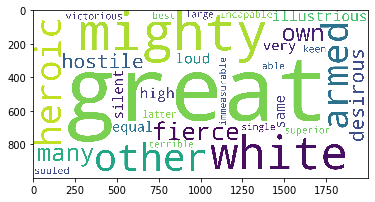

In [126]:
#Arjuna sample word cloud
wc = WordCloud(background_color="white",width=2000,height=1000, max_words=30,relative_scaling=0.25,normalize_plurals=False).generate_from_frequencies(myDict)
plt.imshow(wc)
